In [1]:
import sys
import os
import uproot
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
plt.rcParams["figure.figsize"] = 9, 6
plt.rcParams["font.size"]      = 14

### Analysis npz data:

In [4]:
evts_path = '/Users/romoluque_c/LEGEND/BACON/data_npz/'

all_channels = 9

int_subt_wfs_filt_dict = {}

pos_date1 = 37
pos_date2 = 47

def get_date(filename):
    date_str = filename[pos_date1:pos_date2]
    date = datetime.strptime(date_str, '%m_%d_%Y')
    return date

def sum_wfs_files(data, wf_size=7500):
    num_chunks = len(data) // wf_size
    sum_chunks = np.array([])
    for i in range(num_chunks):
        if i == 0:
            sum_chunks = data[:wf_size]
        else:
            start = i * wf_size
            end   = (i + 1) * wf_size
            chunk = data[start:end]
            sum_chunks = np.add(sum_chunks, chunk)
    return sum_chunks

files        = os.listdir(evts_path)
filt_files   = [file for file in files if file.startswith("BACoN_sig_processing_light")]
sorted_files = sorted(filt_files, key=get_date)

for filename in sorted_files:
    my_file = evts_path+filename
    d = np.load(my_file, allow_pickle=True)
    
    date = filename[pos_date1:pos_date2]
    
    if date not in int_subt_wfs_filt_dict:
        int_subt_wfs_filt  = [np.array([]) for _ in range(all_channels)]

    for channel in range(all_channels):
        if channel==3:
            continue
        int_subt_wfs_filt[channel] = np.append(int_subt_wfs_filt[channel], d['int_subt_wfs_filt'] [channel])
        
    int_subt_wfs_filt_dict[date] = np.array(int_subt_wfs_filt, dtype=object)
    
sum_wfs_dict = {}
for key, vals in int_subt_wfs_filt_dict.items():
    sum_wfs_dict[key] = np.array([sum_wfs_files(val) for val in vals])

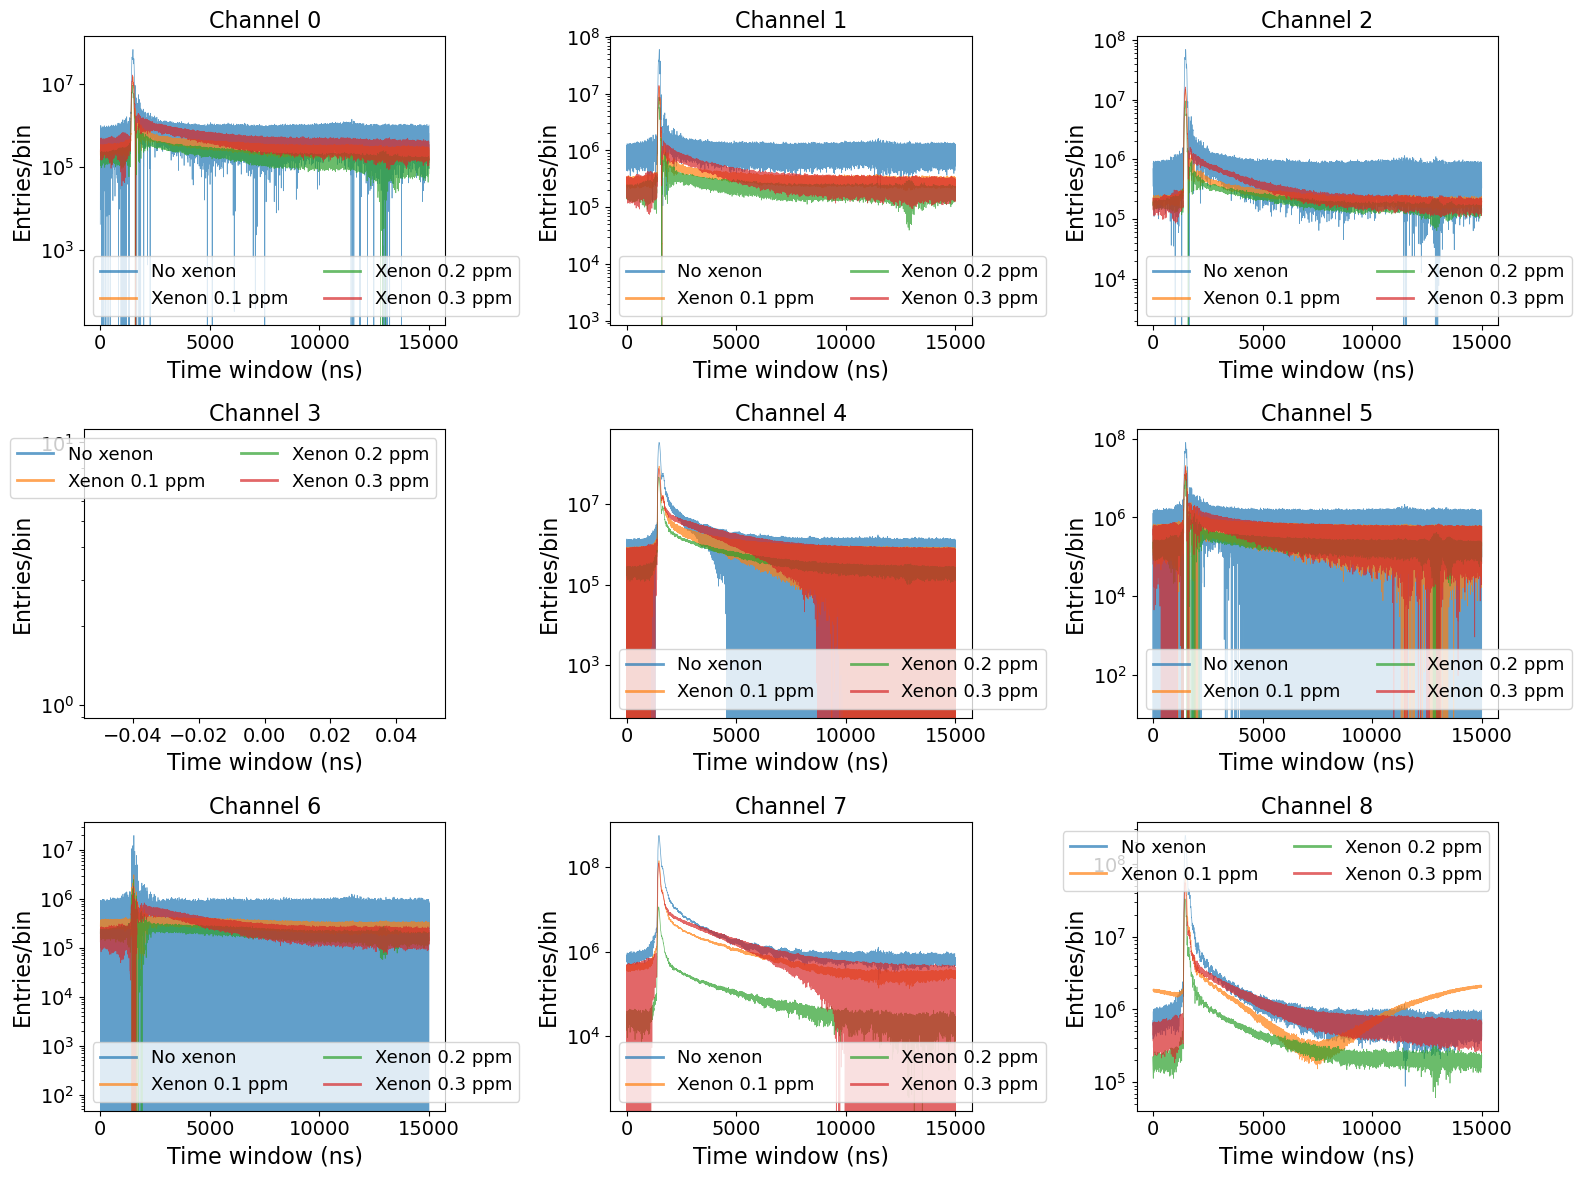

In [5]:
select_date1 = '05_30_2023'
select_date2 = '06_20_2023'
select_date3 = '07_06_2023'
select_date4 = '08_15_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    wf1 = sum_wfs_dict[select_date1][k]
    wf2 = sum_wfs_dict[select_date2][k]
    wf3 = sum_wfs_dict[select_date3][k]
    wf4 = sum_wfs_dict[select_date4][k]
    axs[i][j].plot(2*np.arange(len(wf1)), wf1, linewidth=0.5, alpha=0.7, label=f'No xenon')
    axs[i][j].plot(2*np.arange(len(wf2)), wf2, linewidth=0.5, alpha=0.7, label=f'Xenon 0.1 ppm')
    axs[i][j].plot(2*np.arange(len(wf3)), wf3, linewidth=0.5, alpha=0.7, label=f'Xenon 0.2 ppm')
    axs[i][j].plot(2*np.arange(len(wf4)), wf4, linewidth=0.5, alpha=0.7, label=f'Xenon 0.3 ppm')
    axs[i][j].set_xlabel('Time window (ns)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].set_yscale('log')
    leg = axs[i][j].legend(fontsize=13, ncol=2)
    for line in leg.get_lines():
        line.set_linewidth(2)
plt.tight_layout()
plt.show()

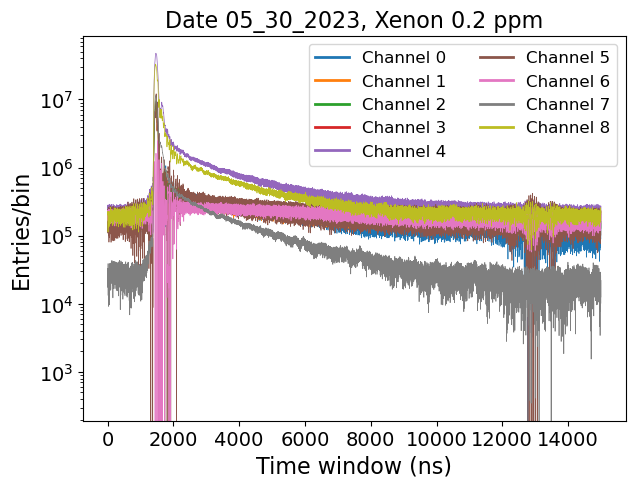

In [6]:
select_date = '07_06_2023'

plt.figure(figsize=(7, 5))
for k in range(9):
    i = int(k/3)
    j = k%3
    wf = sum_wfs_dict[select_date][k]
    plt.plot(2*np.arange(len(wf)), wf, linewidth=0.5, label=f'Channel {k}')
    plt.xlabel('Time window (ns)', fontsize=16)
    plt.ylabel('Entries/bin',      fontsize=16)
plt.title(f"Date {select_date1}, Xenon 0.2 ppm", fontsize=16)
leg = plt.legend(fontsize=12, ncol=2)
for line in leg.get_lines():
    line.set_linewidth(2)
plt.yscale('log')
plt.show()

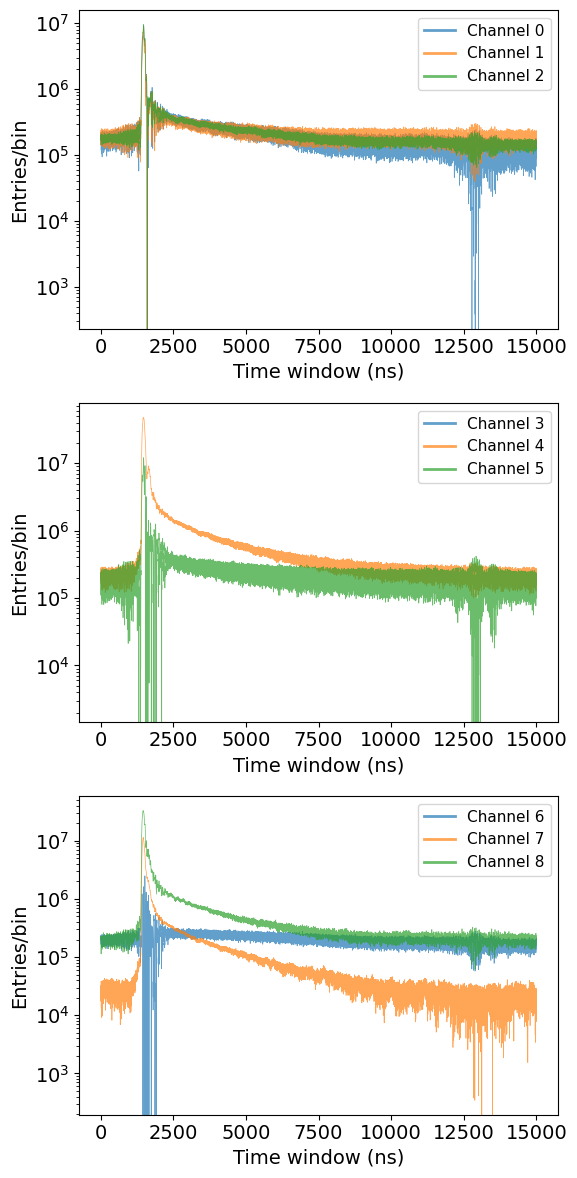

In [7]:
select_date = '07_06_2023'
fig, axs = plt.subplots(3, 1, figsize=(6, 12))
for k in range(9):
    i  = int(k/3)
    wf = sum_wfs_dict[select_date][k]
    axs[i].plot(2*np.arange(len(wf)), wf, linewidth=0.5, label=f'Channel {k}', alpha=0.7)
    axs[i].set_xlabel('Time window (ns)', fontsize=14)
    axs[i].set_ylabel('Entries/bin',      fontsize=14)
    axs[i].set_yscale('log')
    leg = axs[i].legend(fontsize=11)
    for line in leg.get_lines():
        line.set_linewidth(2)

plt.tight_layout()
plt.show()

## No xenon:


                      ---------------------------------------
                      -------------- No XENON ---------------
                      ---------------------------------------



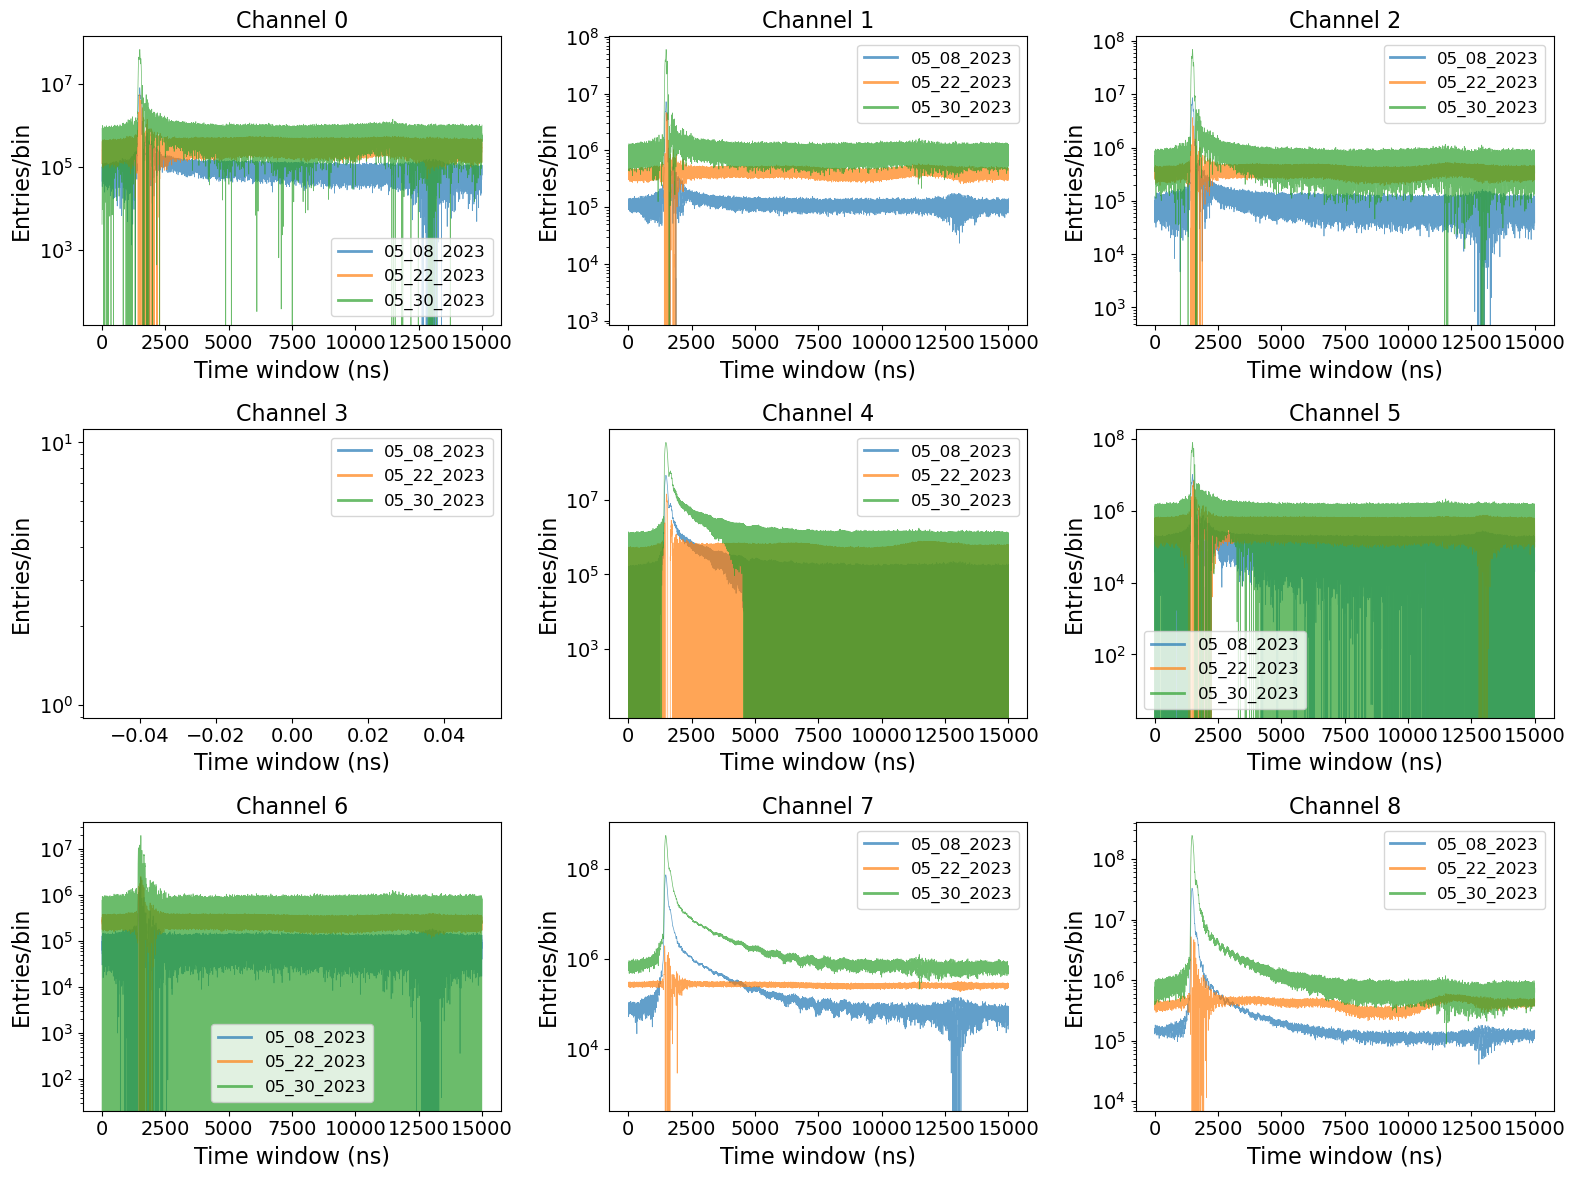

In [8]:
print('')
print('                      ---------------------------------------')
print('                      -------------- No XENON ---------------')
print('                      ---------------------------------------')
print('')

select_date1 = '05_08_2023'
select_date2 = '05_22_2023'
select_date3 = '05_30_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    wf1 = sum_wfs_dict[select_date1][k]
    wf2 = sum_wfs_dict[select_date2][k]
    wf3 = sum_wfs_dict[select_date3][k]
    axs[i][j].plot(2*np.arange(len(wf1)), wf1, linewidth=0.5, label=f'{select_date1}', alpha=0.7)
    axs[i][j].plot(2*np.arange(len(wf2)), wf2, linewidth=0.5, label=f'{select_date2}', alpha=0.7)
    axs[i][j].plot(2*np.arange(len(wf3)), wf3, linewidth=0.5, label=f'{select_date3}', alpha=0.7)
    axs[i][j].set_xlabel('Time window (ns)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].set_yscale('log')
    leg = axs[i][j].legend(fontsize=12)
    for line in leg.get_lines():
        line.set_linewidth(2)
plt.tight_layout()
plt.show()


                      ---------------------------------------
                      ----------- 0.1 ppm XENON -------------
                      ---------------------------------------



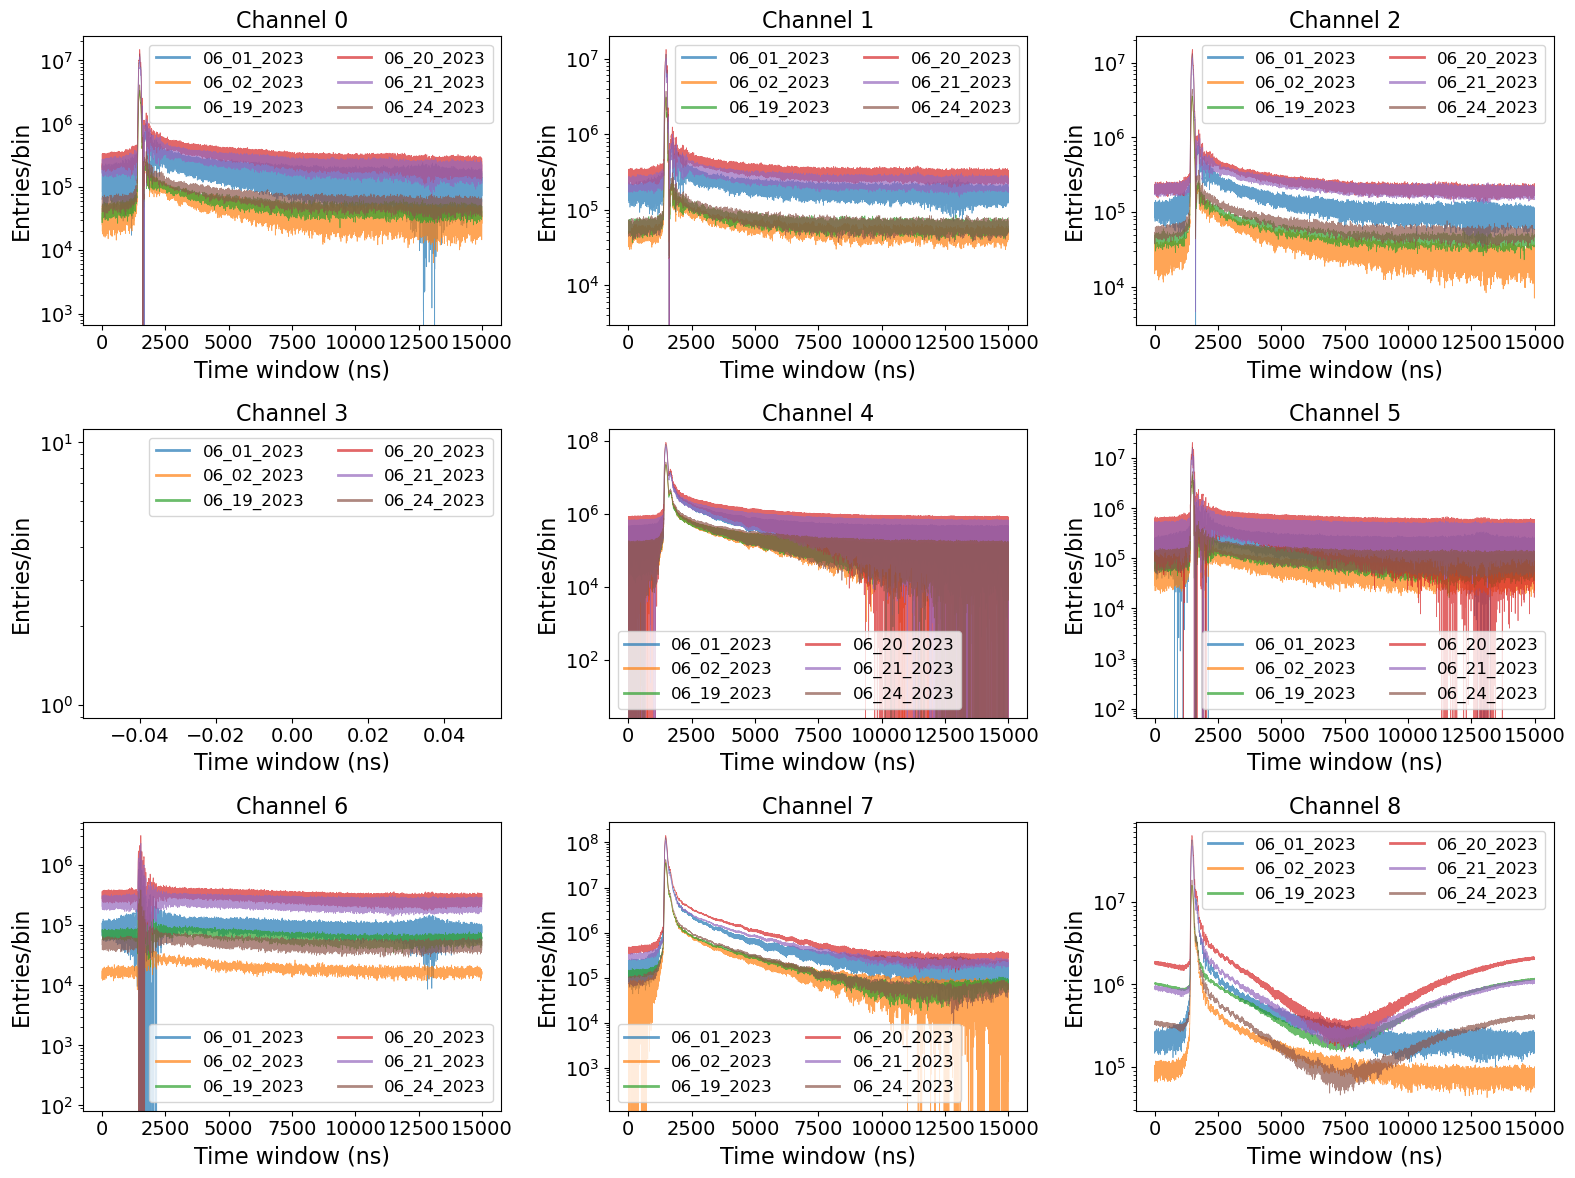

In [9]:
print('')
print('                      ---------------------------------------')
print('                      ----------- 0.1 ppm XENON -------------')
print('                      ---------------------------------------')
print('')

select_date1 = '06_01_2023'
select_date2 = '06_02_2023'
select_date3 = '06_19_2023'
select_date4 = '06_20_2023'
select_date5 = '06_21_2023'
select_date6 = '06_24_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    wf1 = sum_wfs_dict[select_date1][k]
    wf2 = sum_wfs_dict[select_date2][k]
    wf3 = sum_wfs_dict[select_date3][k]
    wf4 = sum_wfs_dict[select_date4][k]
    wf5 = sum_wfs_dict[select_date5][k]
    wf6 = sum_wfs_dict[select_date6][k]
    axs[i][j].plot(2*np.arange(len(wf1)), wf1, linewidth=0.5, label=f'{select_date1}', alpha=0.7)
    axs[i][j].plot(2*np.arange(len(wf2)), wf2, linewidth=0.5, label=f'{select_date2}', alpha=0.7)
    axs[i][j].plot(2*np.arange(len(wf3)), wf3, linewidth=0.5, label=f'{select_date3}', alpha=0.7)
    axs[i][j].plot(2*np.arange(len(wf4)), wf4, linewidth=0.5, label=f'{select_date4}', alpha=0.7)
    axs[i][j].plot(2*np.arange(len(wf5)), wf5, linewidth=0.5, label=f'{select_date5}', alpha=0.7)
    axs[i][j].plot(2*np.arange(len(wf6)), wf6, linewidth=0.5, label=f'{select_date6}', alpha=0.7)
    axs[i][j].set_xlabel('Time window (ns)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].set_yscale('log')
    leg = axs[i][j].legend(fontsize=12, ncol=2)
    for line in leg.get_lines():
        line.set_linewidth(2)
plt.tight_layout()
plt.show()


                      ---------------------------------------
                      ----------- 0.2 ppm XENON -------------
                      ---------------------------------------



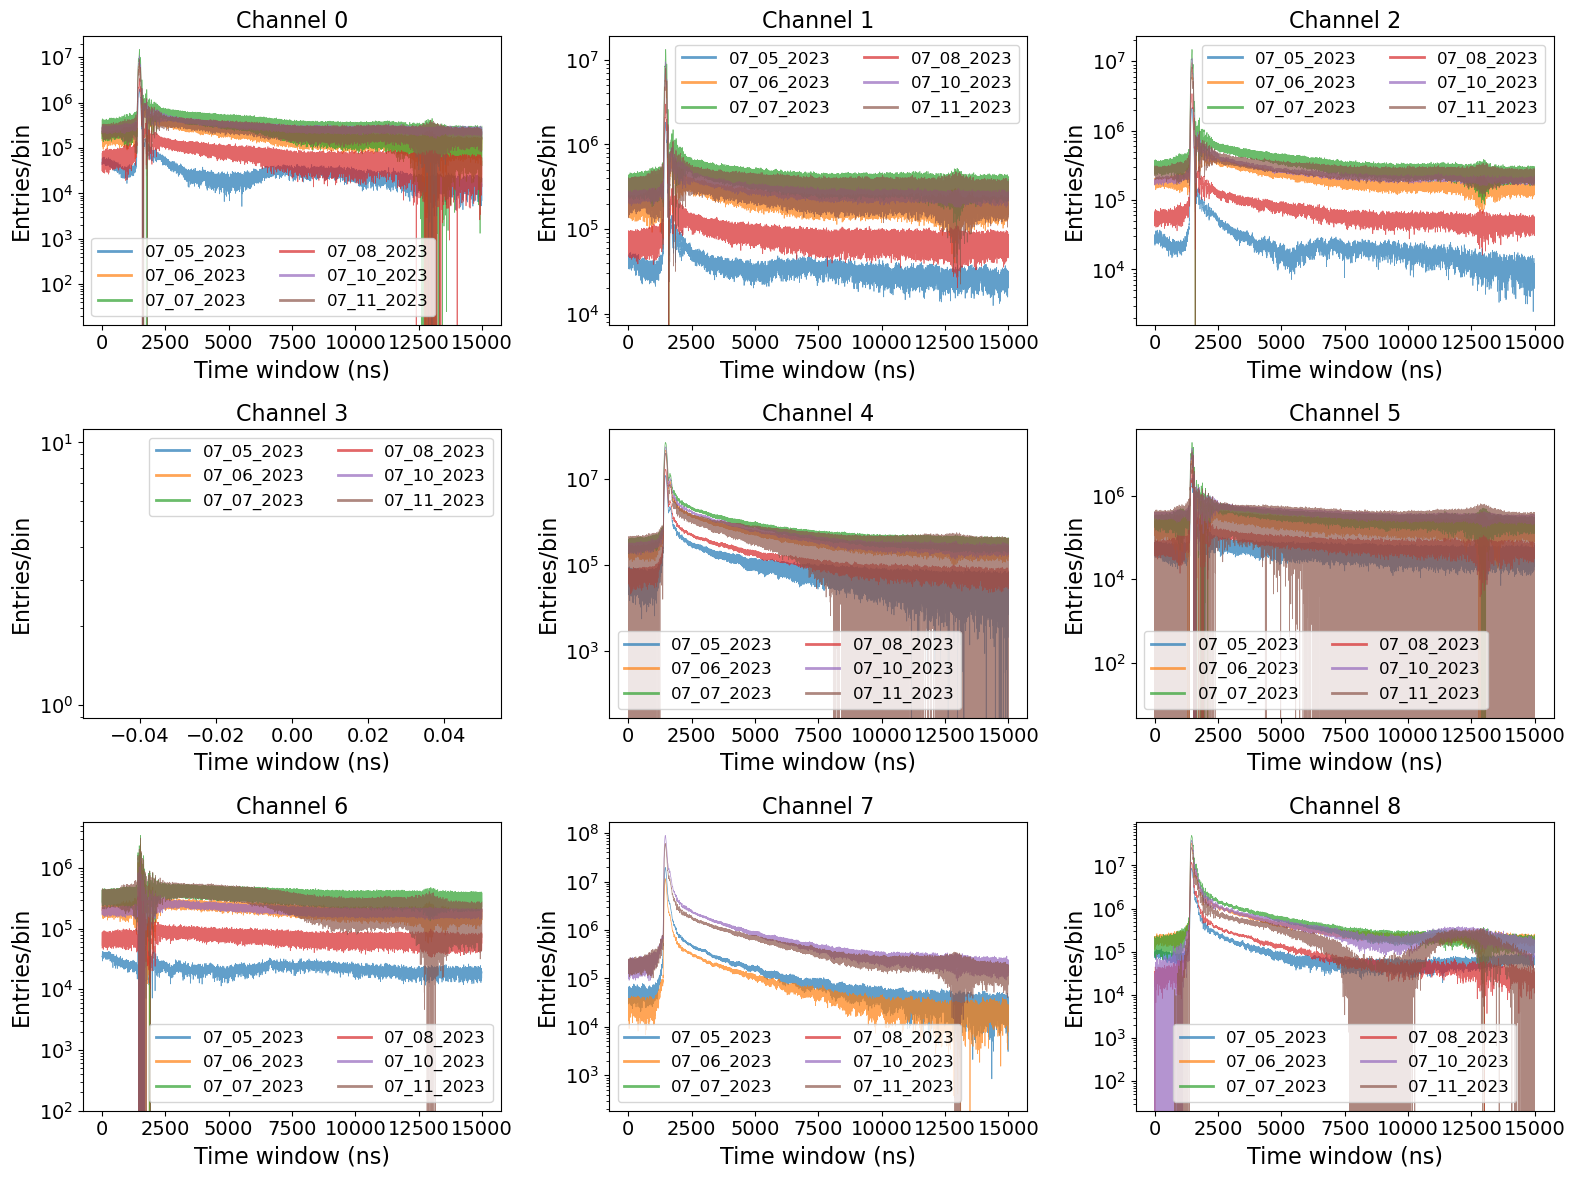

In [10]:
print('')
print('                      ---------------------------------------')
print('                      ----------- 0.2 ppm XENON -------------')
print('                      ---------------------------------------')
print('')

select_date1 = '07_05_2023'
select_date2 = '07_06_2023'
select_date3 = '07_07_2023'
select_date4 = '07_08_2023'
select_date5 = '07_10_2023'
select_date6 = '07_11_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    wf1 = sum_wfs_dict[select_date1][k]
    wf2 = sum_wfs_dict[select_date2][k]
    wf3 = sum_wfs_dict[select_date3][k]
    wf4 = sum_wfs_dict[select_date4][k]
    wf5 = sum_wfs_dict[select_date5][k]
    wf6 = sum_wfs_dict[select_date6][k]
    axs[i][j].plot(2*np.arange(len(wf1)), wf1, linewidth=0.5, label=f'{select_date1}', alpha=0.7)
    axs[i][j].plot(2*np.arange(len(wf2)), wf2, linewidth=0.5, label=f'{select_date2}', alpha=0.7)
    axs[i][j].plot(2*np.arange(len(wf3)), wf3, linewidth=0.5, label=f'{select_date3}', alpha=0.7)
    axs[i][j].plot(2*np.arange(len(wf4)), wf4, linewidth=0.5, label=f'{select_date4}', alpha=0.7)
    axs[i][j].plot(2*np.arange(len(wf5)), wf5, linewidth=0.5, label=f'{select_date5}', alpha=0.7)
    axs[i][j].plot(2*np.arange(len(wf6)), wf6, linewidth=0.5, label=f'{select_date6}', alpha=0.7)
    axs[i][j].set_xlabel('Time window (ns)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].set_yscale('log')
    leg = axs[i][j].legend(fontsize=12, ncol=2)
    for line in leg.get_lines():
        line.set_linewidth(2)
plt.tight_layout()
plt.show()


                      ---------------------------------------
                      ----------- 0.3 ppm XENON -------------
                      ---------------------------------------



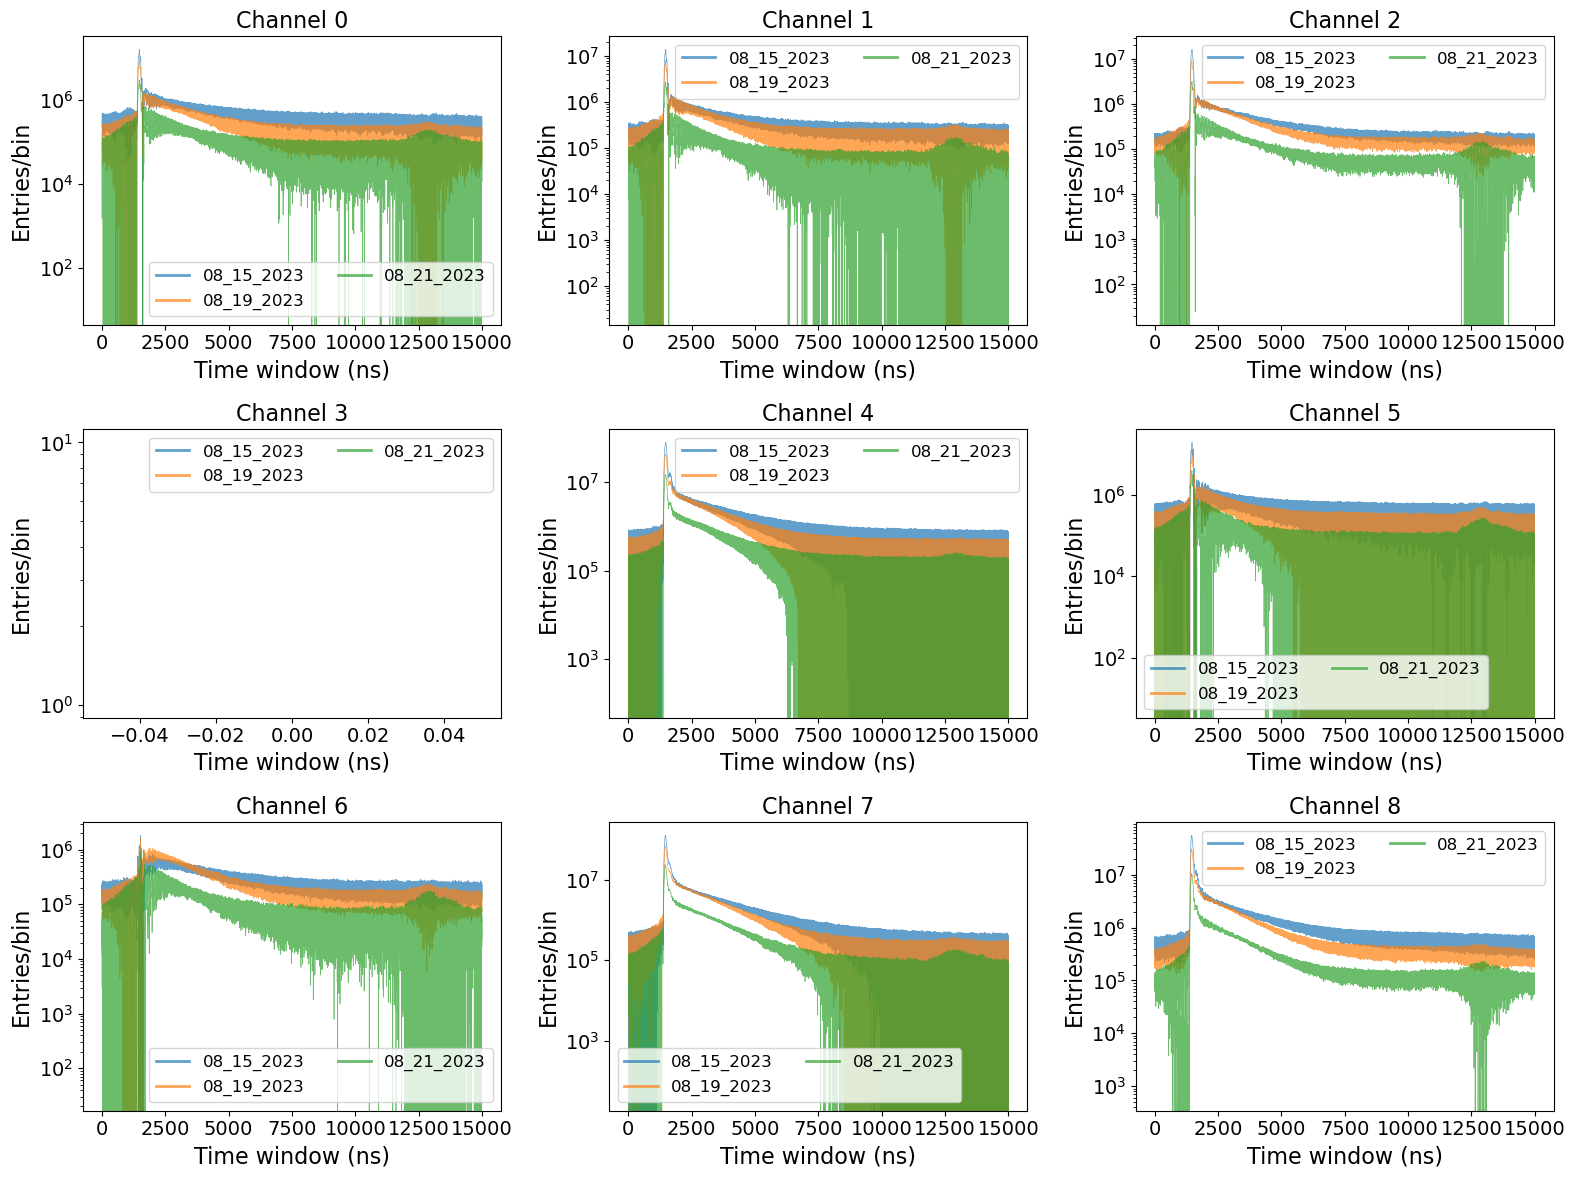

In [11]:
print('')
print('                      ---------------------------------------')
print('                      ----------- 0.3 ppm XENON -------------')
print('                      ---------------------------------------')
print('')

select_date1 = '08_15_2023'
select_date2 = '08_19_2023'
select_date3 = '08_21_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    wf1 = sum_wfs_dict[select_date1][k]
    wf2 = sum_wfs_dict[select_date2][k]
    wf3 = sum_wfs_dict[select_date3][k]
    axs[i][j].plot(2*np.arange(len(wf1)), wf1, linewidth=0.5, label=f'{select_date1}', alpha=0.7)
    axs[i][j].plot(2*np.arange(len(wf2)), wf2, linewidth=0.5, label=f'{select_date2}', alpha=0.7)
    axs[i][j].plot(2*np.arange(len(wf3)), wf3, linewidth=0.5, label=f'{select_date3}', alpha=0.7)
    axs[i][j].set_xlabel('Time window (ns)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].set_yscale('log')
    leg = axs[i][j].legend(fontsize=12, ncol=2)
    for line in leg.get_lines():
        line.set_linewidth(2)
plt.tight_layout()
plt.show()